In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement des données

## 1. Importation des données avec pandas

In [4]:
df = pd.read_csv("../datas/dataset.csv")

## 2. Type et structure des colonnes

In [5]:
df.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,6,148,72,35,0,33.6,0.627,50
1,1,1,85,66,29,0,26.6,0.351,31
2,2,8,183,64,0,0,23.3,0.672,32
3,3,1,89,66,23,94,28.1,0.167,21
4,4,0,137,40,35,168,43.1,2.288,33


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Analyse exploratoire des données

## 1. Comprendre la structure générale du jeu de données

### a. Dimensions

In [7]:
df.shape

(768, 9)

- Nombre de colonnes : 9
- Nombre de Lignes : 768

### b. Type

In [8]:
df.dtypes

Unnamed: 0                    int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object

### c. Aperçu

In [9]:
df.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,6,148,72,35,0,33.6,0.627,50
1,1,1,85,66,29,0,26.6,0.351,31
2,2,8,183,64,0,0,23.3,0.672,32
3,3,1,89,66,23,94,28.1,0.167,21
4,4,0,137,40,35,168,43.1,2.288,33


## 2. Identifier les valeurs manquantes et les doublons

### a. Valeur manquante

In [10]:
df.isnull().sum()

Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

Il n'y a aucune valeur manquante

### b. Doublons

In [11]:
df.columns.duplicated().sum()

np.int64(0)

Il n'y a aucun doublons

### c. Suppression de la colonne 'Unnameed'

In [62]:
df.drop(columns={'Unnamed: 0'}, axis=1, inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [13]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


### 3. Analyser la distribution des variables numériques

In [14]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


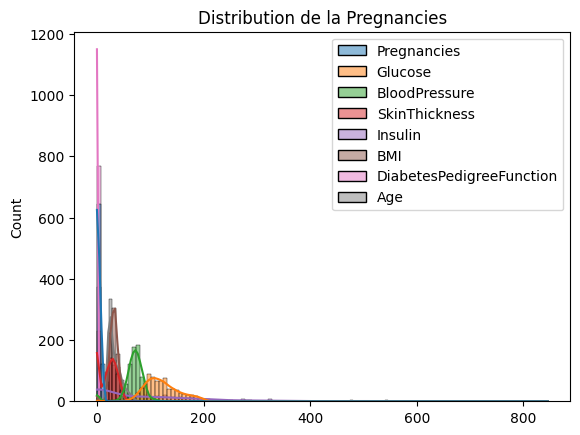

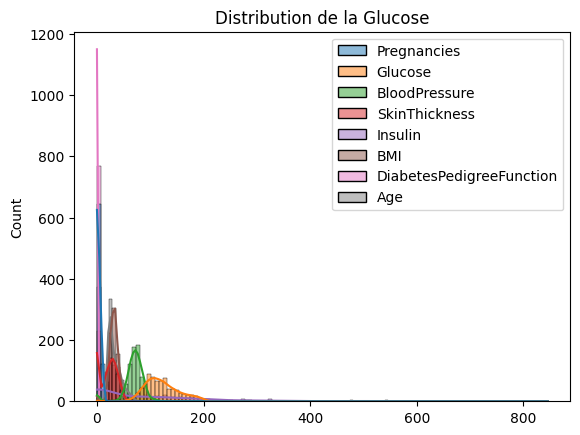

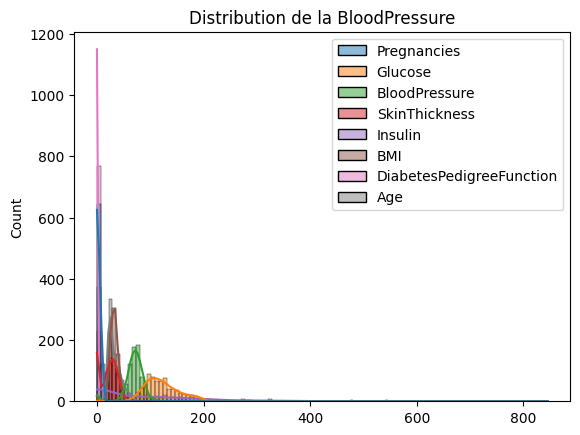

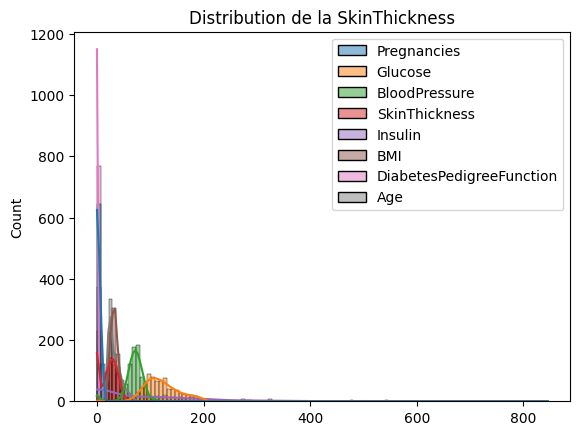

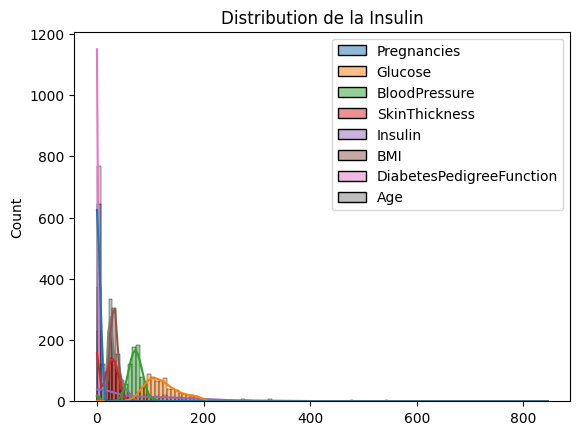

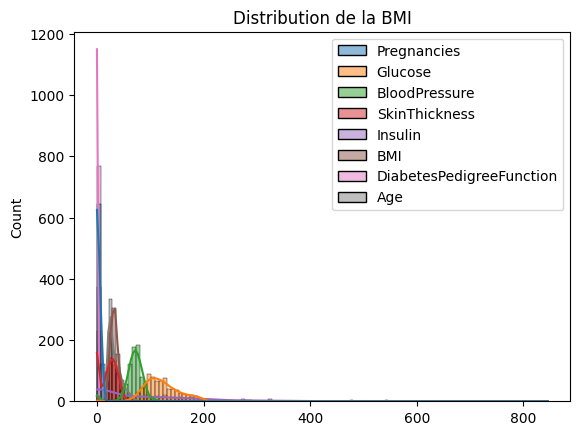

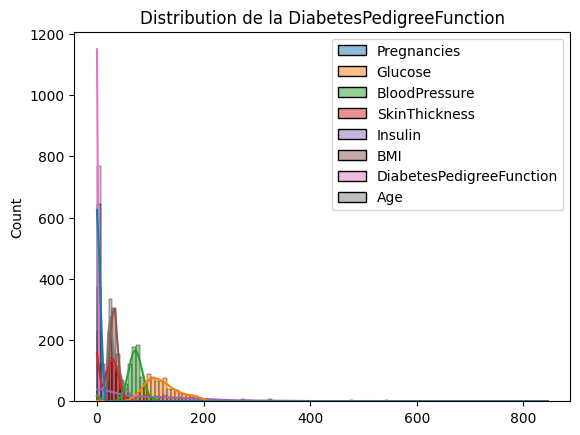

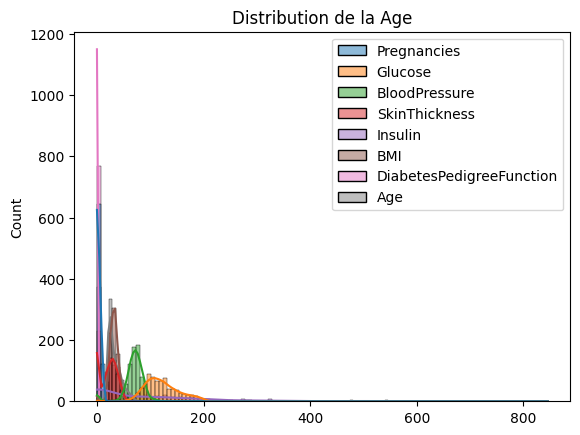

In [61]:
for i in df.select_dtypes(include = "number").columns.tolist():
    sns.histplot(df, kde=True)
    plt.title(f"Distribution de la {i}")
    plt.show()

### 4. Etude des relations entre les variables

### a. Matrice de corrélation

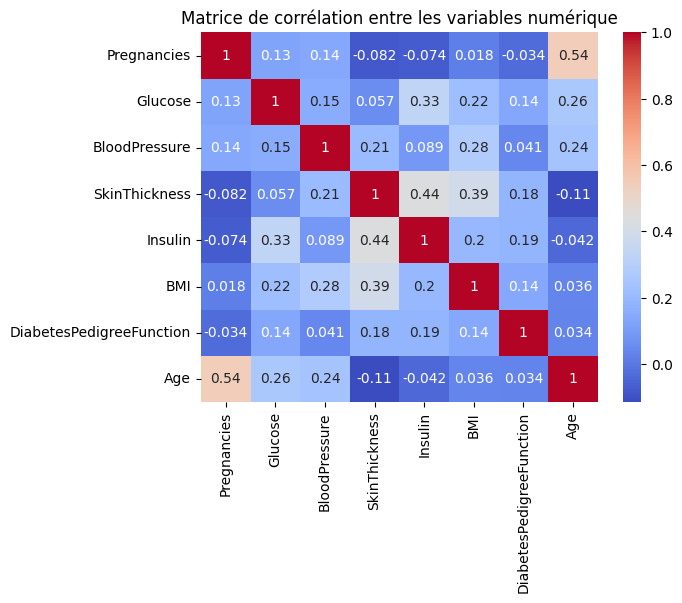

In [16]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation entre les variables numérique")
plt.show()

# Prétraitement des données

### 1. Gestion des valeurs manquantes

Vue qu'il n'y a pas de valeurs manquantes on a pas besoin de les traiter

### 2. Détéction et suppression des valeurs aberrante

### 2.1 Détection des valeurs aberrantes

### a. Methode des interquarties

In [18]:
def outliers(dframe):
    outliers = dframe.copy()
    for i in dframe.select_dtypes(include="number").columns.tolist():
        q1 = dframe[i].quantile(0.25)
        q3 = dframe[i].quantile(0.75)
        iqr = q3 - q1
        b_inf = q1 - 1.5*iqr
        b_sup = q3 + 1.5*iqr
        outliers = dframe[(dframe[i] < b_inf) | (dframe[i] > b_sup)]
    return outliers
outliers = outliers(df)
outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
123,5,132,80,0,0,26.8,0.186,69
363,4,146,78,0,0,38.5,0.520,67
453,2,119,0,0,0,19.6,0.832,72
459,9,134,74,33,60,25.9,0.460,81
489,8,194,80,0,0,26.1,0.551,67
537,0,57,60,0,0,21.7,0.735,67
666,4,145,82,18,0,32.5,0.235,70
674,8,91,82,0,0,35.6,0.587,68
684,5,136,82,0,0,0.0,0.640,69


### b. Mehode boite à moustache 

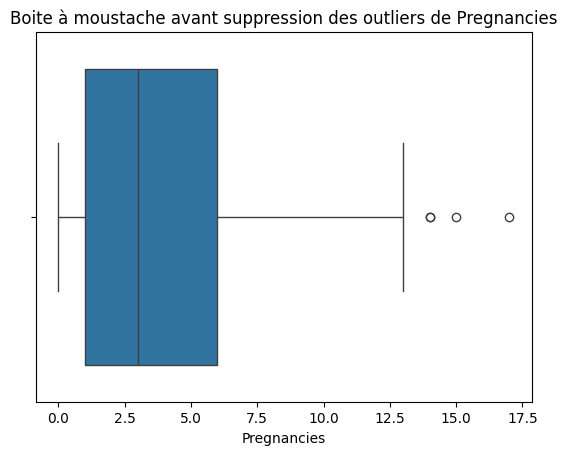

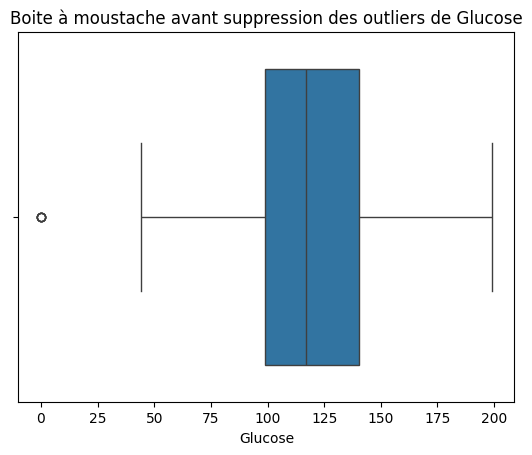

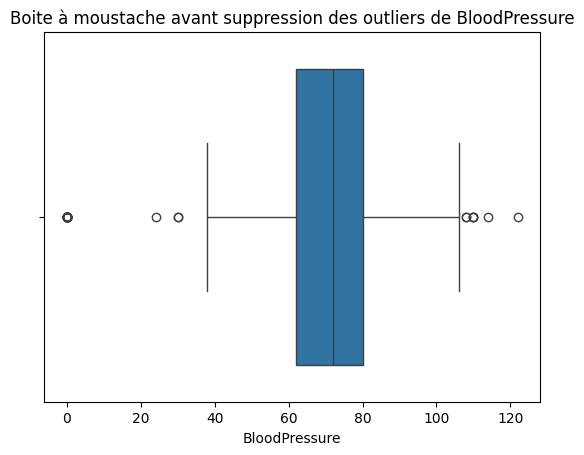

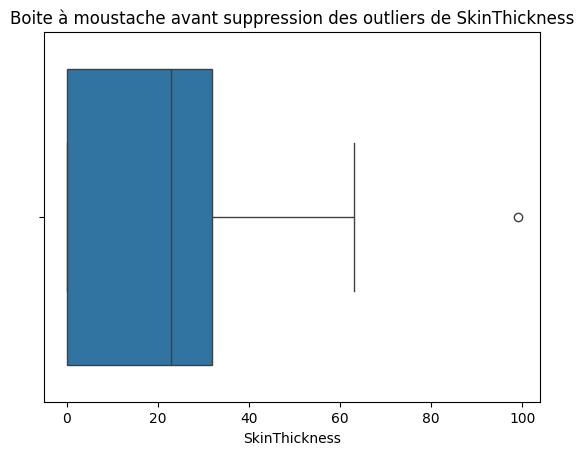

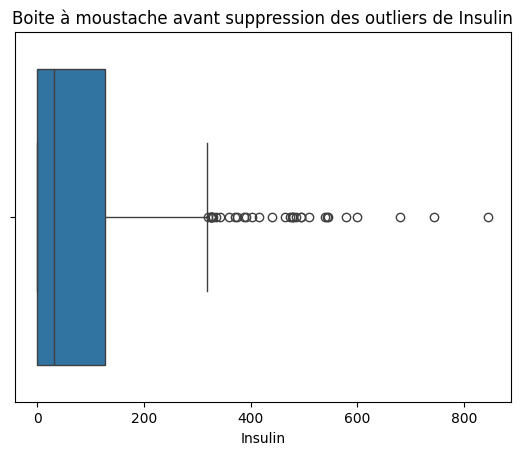

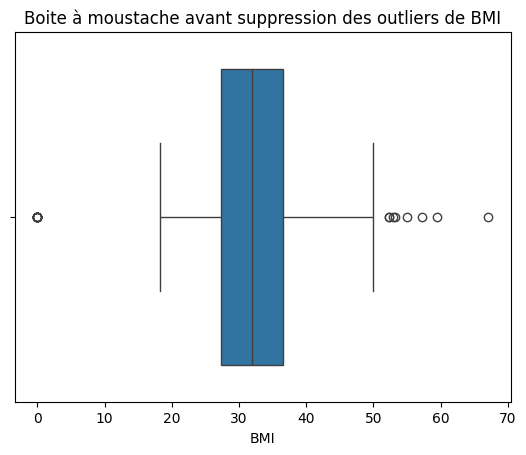

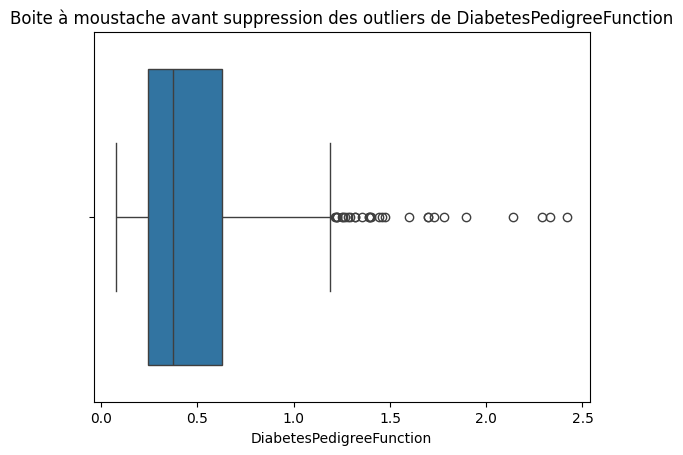

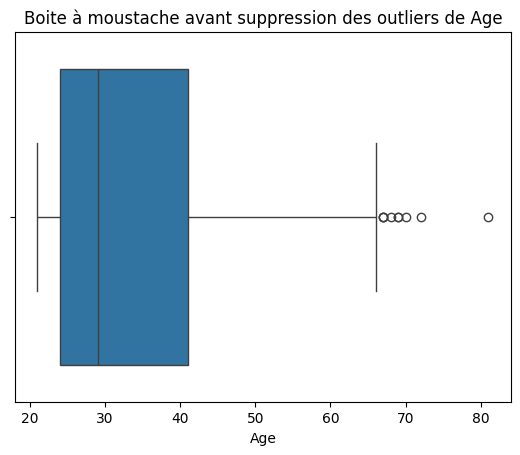

In [19]:
for i in df.select_dtypes(include="number").columns.tolist():
    sns.boxplot(x=df[i])
    plt.title(f"Boite à moustache avant suppression des outliers de {i}")
    plt.show()

### 2.2 Suppression des valeurs aberrantes

In [20]:
def remove_outliers(dframe):
    df_clean = dframe.copy()
    for i in dframe.select_dtypes(include="number").columns.tolist():
        q1 = dframe[i].quantile(0.25)
        q3 = dframe[i].quantile(0.75)
        iqr = q3 - q1
        b_inf = q1 - 1.5*iqr
        b_sup = q3 + 1.5*iqr
        df_clean = dframe[(dframe[i] >= b_inf) & (dframe[i] <= b_sup)]
        
    return df_clean

df_clean=remove_outliers(df)
df_clean


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


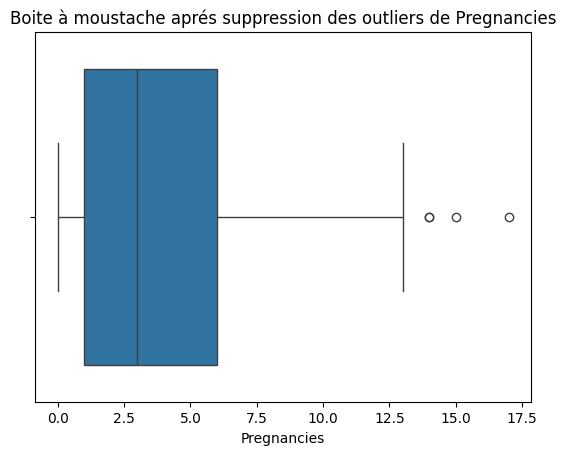

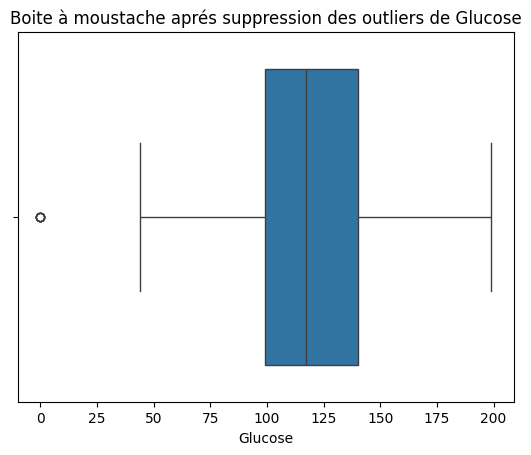

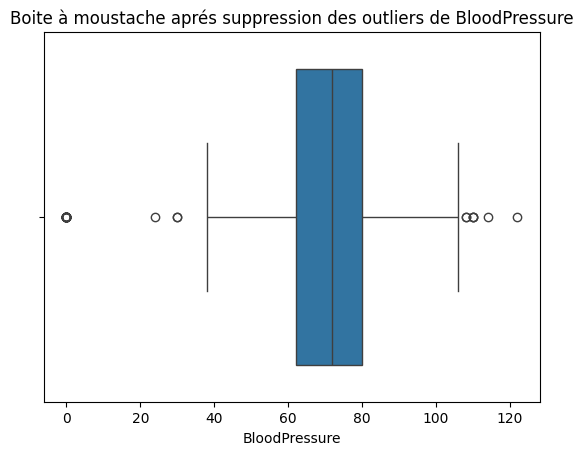

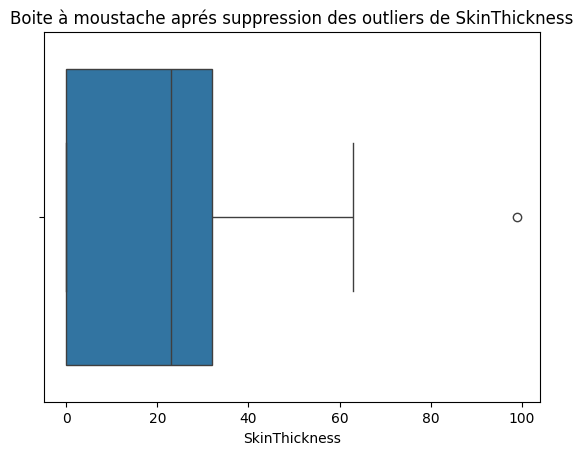

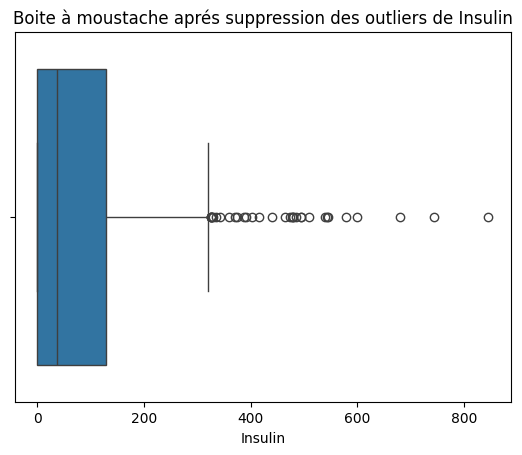

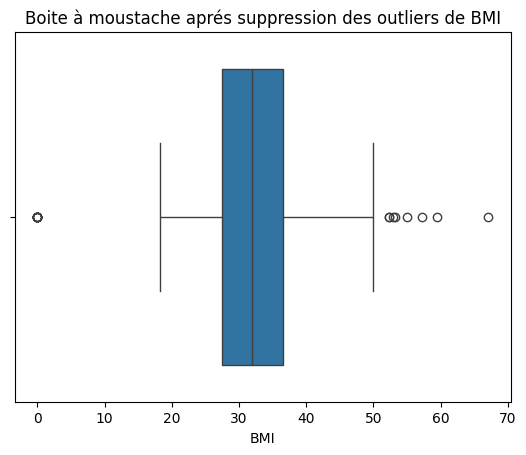

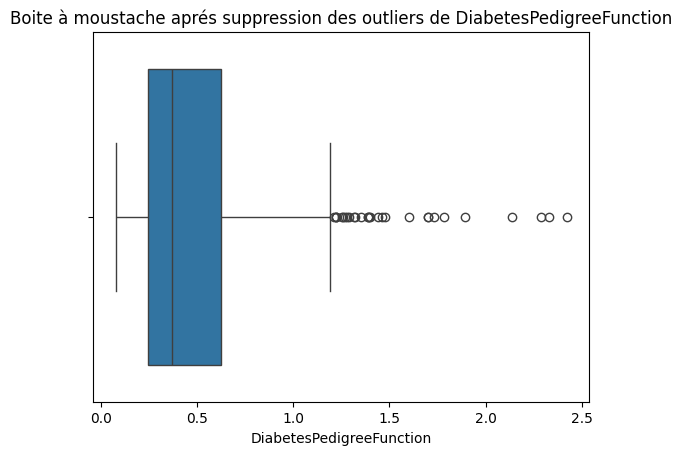

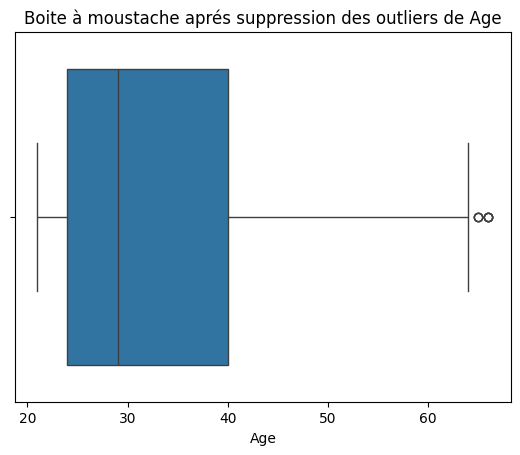

In [21]:
for i in df_clean.select_dtypes(include="number").columns.tolist():
    sns.boxplot(x=df_clean[i])
    plt.title(f"Boite à moustache aprés suppression des outliers de {i}")
    plt.show()

In [22]:
df_clean.shape

(759, 8)

### 3. Analyse exploratoire des relations entre variables

Choix des colonnes jugées significatives: Glucose, BMI, Age, DiabetesPedigreeFunction.

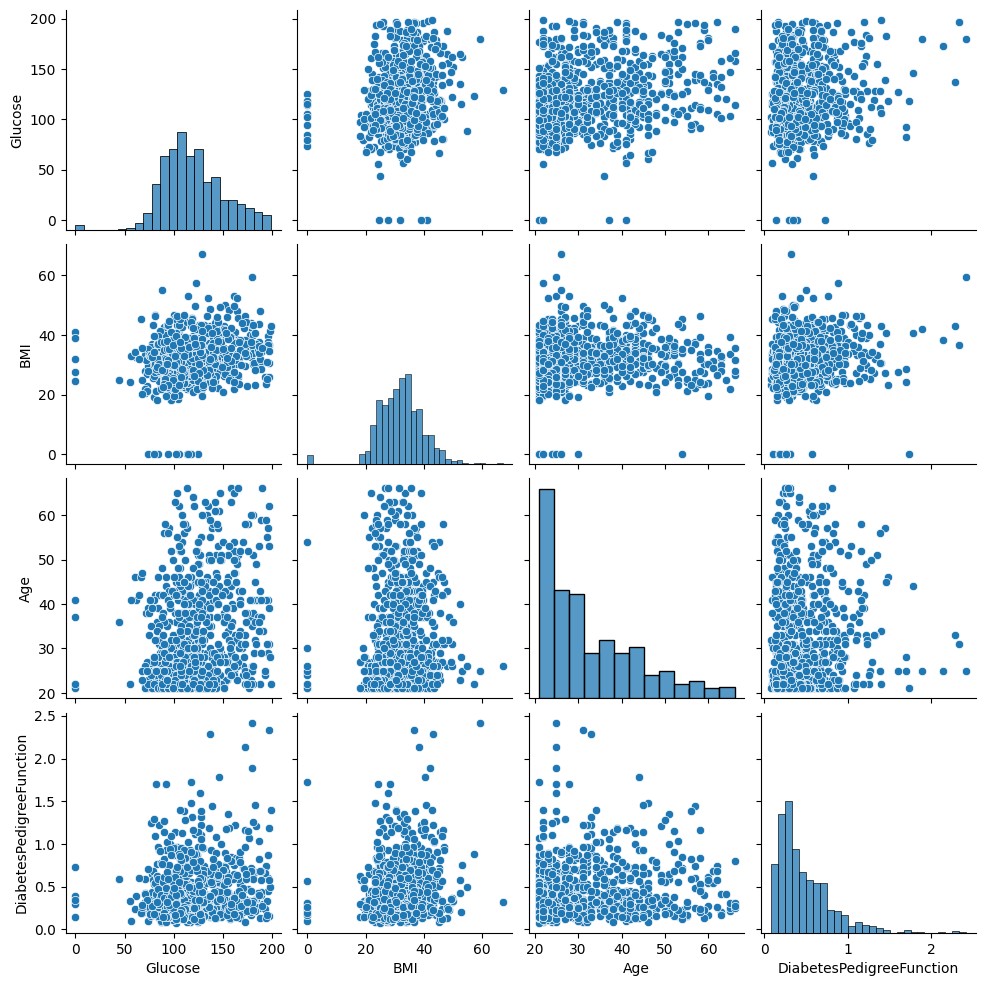

In [23]:
cols = ["Glucose", "BMI", "Age", "DiabetesPedigreeFunction"]
sns.pairplot(df_clean[cols])
plt.show()

### 4. Mise à l’échelle des variables grace à la technique de centrage-réduction(StandardScaler)

In [24]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_clean = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)
df_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.643271,0.852627,0.149988,0.898192,-0.698085,0.195616,0.468793,1.548281
1,-0.839847,-1.122763,-0.161479,0.520991,-0.698085,-0.701269,-0.361774,-0.162527
2,1.236518,1.950066,-0.265301,-1.302146,-0.698085,-1.124086,0.604211,-0.072485
3,-0.839847,-0.997341,-0.161479,0.143790,0.115386,-0.509079,-0.915485,-1.062953
4,-1.136471,0.507718,-1.511169,0.898192,0.755778,1.412818,5.467240,0.017558
...,...,...,...,...,...,...,...,...
754,1.829765,-0.621076,0.357633,1.715460,0.859625,0.105928,-0.903448,2.718835
755,-0.543224,0.037387,0.046166,0.395257,-0.698085,0.605621,-0.394876,-0.522698
756,0.346647,0.006031,0.149988,0.143790,0.271157,-0.752519,-0.680760,-0.252570
757,-0.839847,0.162808,-0.472946,-1.302146,-0.698085,-0.252826,-0.367793,1.278154


Entraînement des modèles de clustering

# Entraînement des modèles de clustering

## 1. Clustering avec K-Means:

#### a. Déterminer la valeur optimale de k via la méthode du coude.

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [30]:
inertias = []
K_range = range(1, 11) 
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_clean)  
    inertias.append(kmeans.inertia_)

#### b. Visualiser la courbe d’inertie pour appuyer le choix de k.

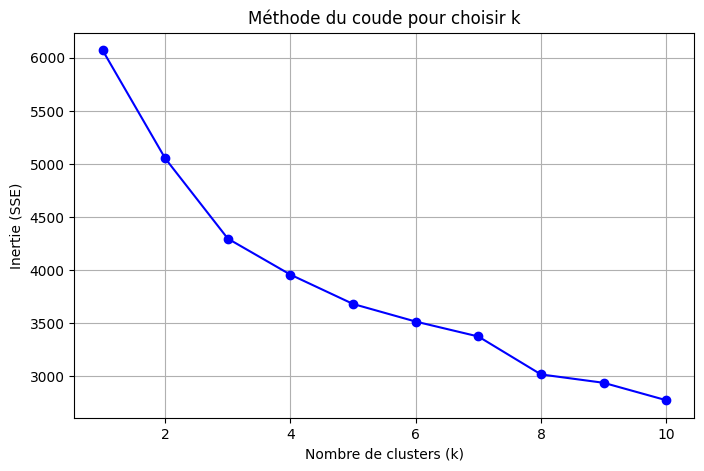

In [31]:
plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie (SSE)')
plt.title('Méthode du coude pour choisir k')
plt.grid()
plt.show()

#### c. Entraîner un modèle K-Means avec le nombre de clusters choisi.

In [33]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(df_clean)
df_clean['Cluster'] = clusters 


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Cluster
0,0.643271,0.852627,0.149988,0.898192,-0.698085,0.195616,0.468793,1.548281,0
1,-0.839847,-1.122763,-0.161479,0.520991,-0.698085,-0.701269,-0.361774,-0.162527,2
2,1.236518,1.950066,-0.265301,-1.302146,-0.698085,-1.124086,0.604211,-0.072485,0
3,-0.839847,-0.997341,-0.161479,0.143790,0.115386,-0.509079,-0.915485,-1.062953,2
4,-1.136471,0.507718,-1.511169,0.898192,0.755778,1.412818,5.467240,0.017558,1


#### d. Ajouter une colonne Cluster au dataset indiquant le groupe assigné à chaque individu.

In [34]:
df_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Cluster
0,0.643271,0.852627,0.149988,0.898192,-0.698085,0.195616,0.468793,1.548281,0
1,-0.839847,-1.122763,-0.161479,0.520991,-0.698085,-0.701269,-0.361774,-0.162527,2
2,1.236518,1.950066,-0.265301,-1.302146,-0.698085,-1.124086,0.604211,-0.072485,0
3,-0.839847,-0.997341,-0.161479,0.143790,0.115386,-0.509079,-0.915485,-1.062953,2
4,-1.136471,0.507718,-1.511169,0.898192,0.755778,1.412818,5.467240,0.017558,1


#### e. Visualiser la répartition des observations par cluster et interpréter les résultats.

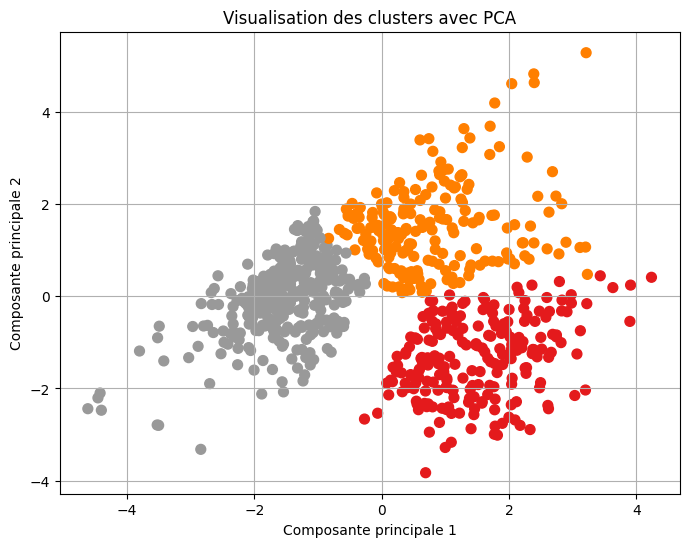

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_clean)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_clean['Cluster'], cmap='Set1', s=50)
plt.title('Visualisation des clusters avec PCA')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.grid()
plt.show()


In [37]:
df_clean.groupby('Cluster')[['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']].mean()

,Glucose,BMI,DiabetesPedigreeFunction,Age
Cluster,,,,
0,0.246980,0.065041,-0.092676,1.086863
1,0.628067,0.642489,0.410878,-0.156789
2,-0.556655,-0.441521,-0.190809,-0.644119


In [39]:
df_clean['risk_category'] = df_clean['Cluster'].apply(lambda x: 1 if x == 1 else 0)
print(df_clean[['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Cluster', 'risk_category']].head())


    Glucose       BMI  DiabetesPedigreeFunction       Age  Cluster  \
0  0.852627  0.195616                  0.468793  1.548281        0   
1 -1.122763 -0.701269                 -0.361774 -0.162527        2   
2  1.950066 -1.124086                  0.604211 -0.072485        0   
3 -0.997341 -0.509079                 -0.915485 -1.062953        2   
4  0.507718  1.412818                  5.467240  0.017558        1   

   risk_category  
0              0  
1              0  
2              0  
3              0  
4              1  


In [40]:
df_clean['Cluster'].value_counts()

Cluster
2    330
0    225
1    204
Name: count, dtype: int64

## 2. Classification supervisée (basée sur les clusters)

#### a. Préparation des données pour la classification:

In [63]:
from sklearn.model_selection import train_test_split

# Définir la variable cible Y
y = df_clean['risk_category']

# Définir les variables explicatives
X = df_clean[['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']]


In [64]:
#Division en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,  
    random_state=42,
    stratify=y 
)


In [46]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable

   ---------------------------------------- 0/3 [sklearn-compat]
   ---------------------------------------- 0/3 [sklearn-compat]
   ---------------------------------------- 0/3 [sklearn-compat]
   ---------------------------------------- 0/3 [sklearn-compat]
   ---------------------------------------- 0/3 [sklearn-compat]
   ---------------------------------------- 0/3 [sklearn-compat]
   ---------------------------------------- 0/3 [sklearn-compat]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-lear

In [47]:
from imblearn.over_sampling import RandomOverSampler

# Appliquer le suréchantillonnage sur les données d'entraînement uniquement
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)


#### b. Entraînement de plusieurs modèles de classification & Leur évaluation

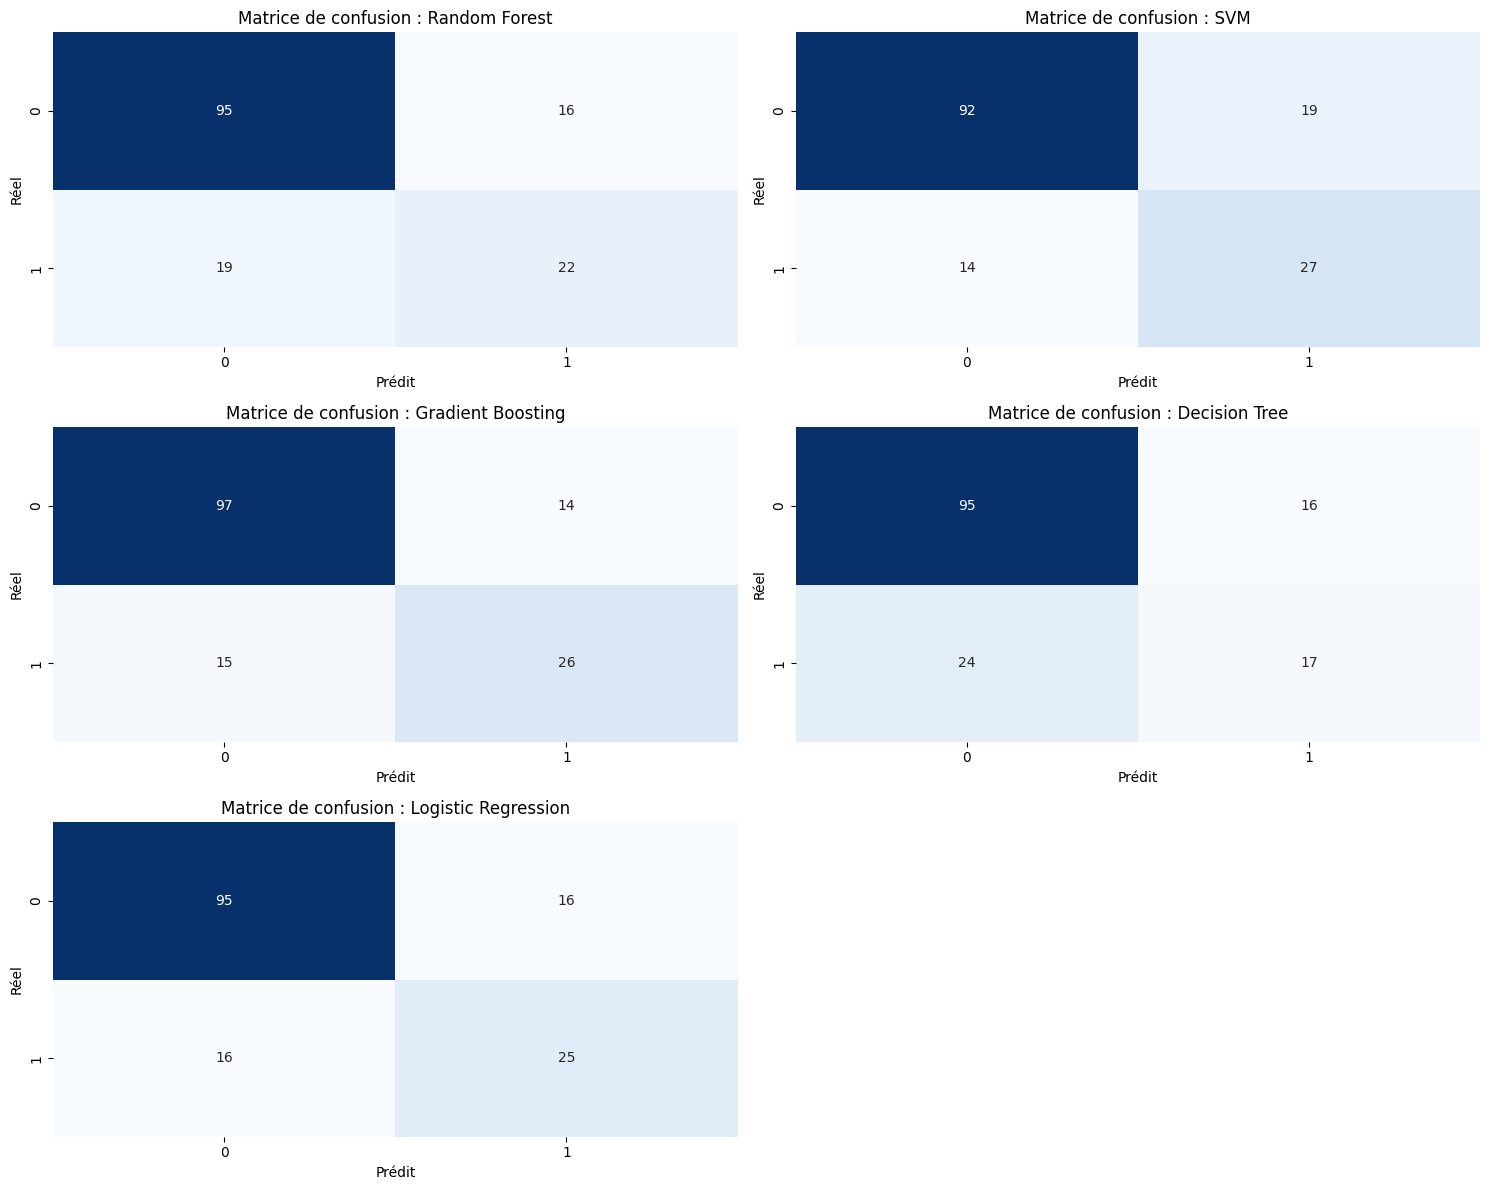

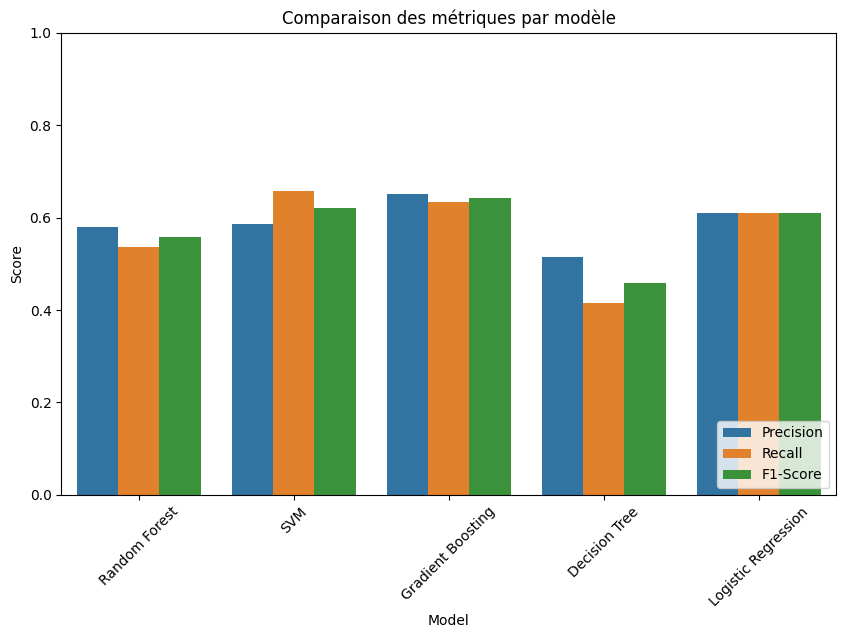

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Préparation des données
X = df_clean[['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df_clean['risk_category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Modèles
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Pour stocker les scores
scores = {
    'Model': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

plt.figure(figsize=(15, 12))

for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    
    # Calcul des métriques
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Stockage
    scores['Model'].append(name)
    scores['Precision'].append(precision)
    scores['Recall'].append(recall)
    scores['F1-Score'].append(f1)
    
    # Matrice de confusion graphique
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(3, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Matrice de confusion : {name}')
    plt.xlabel('Prédit')
    plt.ylabel('Réel')

plt.tight_layout()
plt.show()

# Affichage des scores sous forme de barplot
import pandas as pd

df_scores = pd.DataFrame(scores)

df_scores_melt = df_scores.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_scores_melt, x='Model', y='Score', hue='Metric')
plt.title('Comparaison des métriques par modèle')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()


#### c. Validation croisée

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline  # pipeline compatible imblearn
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline

In [54]:

# X et y définis comme avant
X = df_clean[['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df_clean['risk_category']

# Modèles
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# StratifiedKFold pour garder la proportion des classes
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    # Pipeline avec RandomOverSampler et le modèle
    pipeline = ImbPipeline([
        ('oversampler', RandomOverSampler(random_state=42)),
        ('classifier', model)
    ])
    
    print(f"\n=== Validation croisée : {name} ===")
    
    # cross_validate avec plusieurs métriques
    scores = cross_validate(
        pipeline, X, y,
        scoring=['precision', 'recall', 'f1'],
        cv=cv,
        return_train_score=False
    )
    
    print(f"Précision moyenne : {np.mean(scores['test_precision']):.3f} ± {np.std(scores['test_precision']):.3f}")
    print(f"Rappel moyen    : {np.mean(scores['test_recall']):.3f} ± {np.std(scores['test_recall']):.3f}")
    print(f"F1-score moyen  : {np.mean(scores['test_f1']):.3f} ± {np.std(scores['test_f1']):.3f}")



=== Validation croisée : Random Forest ===
Précision moyenne : 0.598 ± 0.060
Rappel moyen    : 0.584 ± 0.087
F1-score moyen  : 0.589 ± 0.068

=== Validation croisée : SVM ===
Précision moyenne : 0.556 ± 0.049
Rappel moyen    : 0.819 ± 0.088
F1-score moyen  : 0.661 ± 0.055

=== Validation croisée : Gradient Boosting ===
Précision moyenne : 0.583 ± 0.072
Rappel moyen    : 0.643 ± 0.127
F1-score moyen  : 0.609 ± 0.088

=== Validation croisée : Decision Tree ===
Précision moyenne : 0.525 ± 0.088
Rappel moyen    : 0.481 ± 0.134
F1-score moyen  : 0.497 ± 0.105

=== Validation croisée : Logistic Regression ===
Précision moyenne : 0.592 ± 0.056
Rappel moyen    : 0.770 ± 0.087
F1-score moyen  : 0.668 ± 0.060


#### d. Optimisation des hyperparamètres

In [57]:

# Données (X, y) déjà définies

# Pipeline : sur-échantillonnage + modèle
pipeline = Pipeline([
    ('oversampler', RandomOverSampler(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42))
])

# Grille d’hyperparamètres à tester
param_grid = {
    'clf__n_estimators': [50, 100, 200],          # nombre d'arbres
    'clf__max_depth': [None, 10, 20, 30],         # profondeur max des arbres
    'clf__min_samples_split': [2, 5, 10],         # min d’échantillons pour splitter un noeud
    'clf__min_samples_leaf': [1, 2, 4]             # min d’échantillons dans une feuille
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1',          # optimiser selon le F1-score (équilibre précision/rappel)
    cv=cv,
    n_jobs=-1,
    verbose=2
)

# Lancer la recherche
grid_search.fit(X, y)

# Meilleurs paramètres
print("Meilleurs paramètres : ", grid_search.best_params_)
print(f"Meilleur F1-score moyen CV : {grid_search.best_score_:.3f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Meilleurs paramètres :  {'clf__max_depth': 10, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 10, 'clf__n_estimators': 50}
Meilleur F1-score moyen CV : 0.640


#### e. Sélection et sauvegarde du meilleur modèle

In [58]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

import joblib

# Préparation données
X = df_clean[['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df_clean['risk_category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

best_model = None
best_f1 = 0
best_name = ""

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    print(f"{name} - F1-score: {f1:.3f}")
    if f1 > best_f1:
        best_f1 = f1
        best_model = model
        best_name = name

print(f"\nMeilleur modèle : {best_name} avec F1-score = {best_f1:.3f}")


Random Forest - F1-score: 0.557
SVM - F1-score: 0.621
Gradient Boosting - F1-score: 0.642
Decision Tree - F1-score: 0.459
Logistic Regression - F1-score: 0.610

Meilleur modèle : Gradient Boosting avec F1-score = 0.642


In [ ]:
# Sauvegarde dans un fichier .pkl
joblib.dump(best_model, 'best_model.pkl')
print(f"Modèle sauvegardé dans 'best_model.pkl'")


#### f. Sauvegarde de modèle final

In [ ]:
import joblib

# Supposons que `best_model` est ton modèle sélectionné
joblib.dump(best_model, 'model.pkl')

print("Modèle sauvegardé dans 'model.pkl'")
